Model Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

In [3]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings

In [4]:
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
X = df.iloc[:,:-1]
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78


In [7]:
y = df.iloc[:,-1]
y

0      74
1      88
2      93
3      44
4      75
       ..
995    95
996    55
997    65
998    77
999    86
Name: writing_score, Length: 1000, dtype: int64

In [8]:
numerical_features = X.select_dtypes(exclude='object').columns
numerical_features

Index(['math_score', 'reading_score'], dtype='object')

In [9]:
categorical_features = X.select_dtypes(include='object').columns
categorical_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

- Now we will convert the object features into numerical
- We will standardize the numerical features

In [10]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
encoder = OneHotEncoder()

column_transformer = ColumnTransformer(
    [
        ("StandardScaler",scaler,numerical_features),
        ("OnehotEncoder",encoder,categorical_features)
    ]
)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=93)

In [12]:
X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

In [13]:
X_train.shape,X_test.shape

((800, 19), (200, 19))

Creating a function for evaluation

In [14]:
def evaluation(true,pred):
    mae = mean_absolute_error(true,pred)
    mse = mean_squared_error(true,pred)
    rmse = np.sqrt(mean_squared_error(true,pred))
    r2score = r2_score(true,pred)
    return mae,mse,rmse,r2score

In [15]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Decision Tree":DecisionTreeRegressor(),
    "KNeighbors":KNeighborsRegressor(),
    "Random Forest":RandomForestRegressor(),
    "Support Vector Machine":SVR(),
    "Adaboost":AdaBoostRegressor(),
    "Gradient Boost":GradientBoostingRegressor(),
    "Xgboost":XGBRegressor(),
    "catboost":CatBoostRegressor()
}
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    model_mae,model_mse,model_rmse,model_r2score = evaluation(y_test,y_pred)
    print(list(models.keys())[i])
    print("Model Performance for Test set")
    print(f"Mae : {model_mae}")
    print(f"Mse : {model_mse}")
    print(f"Rmse : {model_rmse}")
    print(f"r2 score : {model_r2score}")
    r2_list.append(model_r2score)

Linear Regression
Model Performance for Test set
Mae : 2.6964096319194146
Mse : 11.507506975652118
Rmse : 3.392271654165114
r2 score : 0.9514463013584706
Lasso
Model Performance for Test set
Mae : 3.597596786069439
Mse : 20.4603139755571
Rmse : 4.5233078577029335
r2 score : 0.913671664854761
Ridge
Model Performance for Test set
Mae : 2.6985879108960003
Mse : 11.524782996360925
Rmse : 3.394817078483158
r2 score : 0.9513734085325097
Decision Tree
Model Performance for Test set
Mae : 4.5275
Mse : 31.88625
Rmse : 5.646791124169549
r2 score : 0.8654621390554724
KNeighbors
Model Performance for Test set
Mae : 4.232
Mse : 26.47
Rmse : 5.144900387762624
r2 score : 0.888314957726241
Random Forest
Model Performance for Test set
Mae : 3.1615129166666667
Mse : 15.255601242118058
Rmse : 3.9058419376772093
r2 score : 0.9356319429679801
Support Vector Machine
Model Performance for Test set
Mae : 3.7092504411431184
Mse : 28.416472598253968
Rmse : 5.330710327738131
r2 score : 0.8801021932978048
Adaboos

In [16]:
r2_list

[0.9514463013584706,
 0.913671664854761,
 0.9513734085325097,
 0.8654621390554724,
 0.888314957726241,
 0.9356319429679801,
 0.8801021932978048,
 0.9223528954268299,
 0.9477763102850307,
 0.9365689158439636,
 0.944274585262846]

In [17]:
model_list = list(models)
print(model_list)

['Linear Regression', 'Lasso', 'Ridge', 'Decision Tree', 'KNeighbors', 'Random Forest', 'Support Vector Machine', 'Adaboost', 'Gradient Boost', 'Xgboost', 'catboost']


In [18]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Models','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Models,R2 Score
0,Linear Regression,0.951446
2,Ridge,0.951373
8,Gradient Boost,0.947776
10,catboost,0.944275
9,Xgboost,0.936569
5,Random Forest,0.935632
7,Adaboost,0.922353
1,Lasso,0.913672
4,KNeighbors,0.888315
6,Support Vector Machine,0.880102


The Best Performing models are here Linear Regression and Ridge

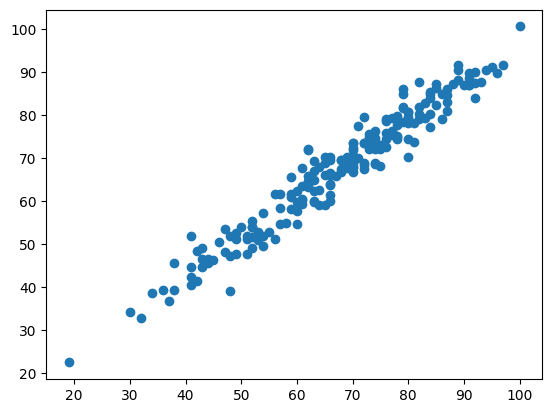

In [19]:
plt.scatter(y_test,y_pred)


<Axes: xlabel='writing_score'>

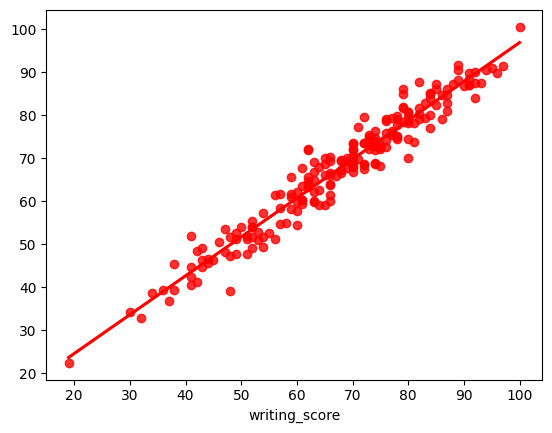

In [20]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

#### Difference between Actual and Predicted Values

In [21]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
328,77,76.260215,0.739785
803,87,84.710917,2.289083
928,44,45.652159,-1.652159
158,87,80.912653,6.087347
662,69,69.445131,-0.445131
...,...,...,...
559,62,63.640141,-1.640141
907,91,88.455031,2.544969
718,74,76.340862,-2.340862
105,72,67.464595,4.535405
